<h2>Analisando o dataset do Titanic</h2>

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic = pd.read_csv('datasets/titanic_data.csv')

In [3]:
titanic.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [4]:
# limpando os dados (tirando as colunas que não iremos utilizar)
titanic.drop(titanic.columns[[0,2,6,8,9,10]], axis=1, inplace = True)
titanic.head(6)

,Survived,Name,Sex,Age,Parch,Embarked
0,0,"Braund, Mr. Owen Harris",male,22.0,0,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0,C
2,1,"Heikkinen, Miss. Laina",female,26.0,0,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,S
4,0,"Allen, Mr. William Henry",male,35.0,0,S
5,0,"Moran, Mr. James",male,NaN,0,Q


<h2>Perguntas que serão respondidas</h2><br>
1- Qual foi a porcentagem dos passageiros sobreviventes?<br>
2- Qual era a faixa etária dos passageiros que estavam no Titanic?<br>
3- A partir desta faixa etária, mais crianças ou mais adultos sobreviveram?

In [5]:
print('Sobreviventes     :', titanic['Survived'].value_counts()[1])
print('Não Sobreviventes :', titanic['Survived'].value_counts()[0])

Sobreviventes     : 342
Não Sobreviventes : 549


Text(0,0.5,'')

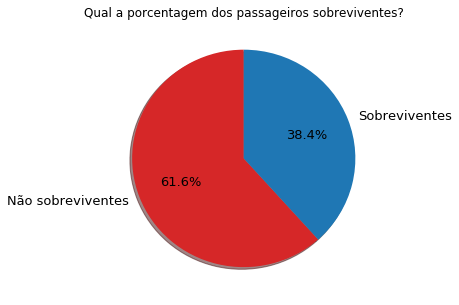

In [6]:
#Gera o grafico
titanic['Survived'].value_counts().plot.pie(colors=('tab:red', 'tab:blue'),title='Qual a porcentagem dos passageiros sobreviventes?',fontsize=13, shadow=True,startangle=90,autopct='%1.1f%%',
labels=('Não sobreviventes','Sobreviventes'),
figsize=(5,5)).set_ylabel('')

In [7]:
titanic_idade = titanic[['Age', 'Survived']].copy()
titanic_idade.drop(titanic[titanic['Age'].isnull() == True].index ,inplace=True)

In [8]:
titanic_idade.head(10)

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0
6,54.0,0
7,2.0,0
8,27.0,1
9,14.0,1
10,4.0,1


Text(0,0.5,'Frequência')

<Figure size 432x288 with 0 Axes>

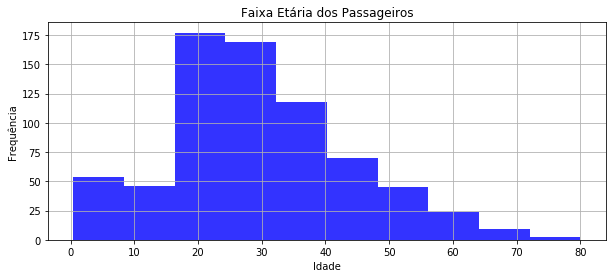

In [9]:
plt.figure();
titanic_idade.hist(column='Age', color=('blue'), alpha=0.8, bins=10, figsize=(10,4))
plt.title('Faixa Etária dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Frequência')

(Text(0,0.5,''), Text(0.5,0,''))

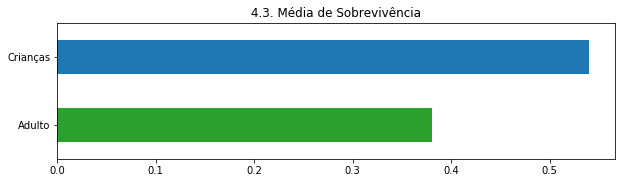

In [10]:
titanic_idade['Crianca_Adulto'] = 0
titanic_idade.loc[titanic_idade[titanic_idade['Age'] < 18].index, 'Crianca_Adulto'] = 'Crianças'
titanic_idade.loc[titanic_idade[titanic_idade['Age'] >= 18].index, 'Crianca_Adulto'] = 'Adulto'
titanic_idade.groupby('Crianca_Adulto')[['Survived']].mean()

titanic_idade.groupby('Crianca_Adulto')['Survived'].mean().plot.barh(title='4.3. Média de Sobrevivência', figsize=(10,2.5),
                                                                color=('tab:green','tab:blue')).set_ylabel(''),plt.xlabel('')